<a href="https://colab.research.google.com/github/castynyaga/Statistics-IP/blob/main/New_Statistics_IP_Casty_Nyaga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1 Descriptive Statistics

# Defining the question

**a)Specifying the question**

How to predict individuals that are most likely to have or use a bank account?

**b) Defining Metric of Success**

a) Provide insights on demographic factors that might drive individuals financial outcomes

b) Identify key demographic factors that influence whether and individual having or using a bank account or not

c)provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda

**c)Understanding the Context**

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.


**d)Experimental design taken**
1. 	Defining the question, the metric for success, the context, experimental design taken and the appropriateness of the available data 
2. 	Finding and dealing with outliers, anomalies, and missing data within the dataset.
3.	Performing univariate, bivariate and multivariate analysis recording your observations.
4. Providing insights and recommendations


**e)Data relevance/appropriateness of data**


Calculation of the percentage oF people with bank account from our dataset shows 14.06% of the population have bank accounts while 85.78% do not.

Comparing that with the provided information (i.e Across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.of adultpopulation), we conclude that our dataset is a true representation of the known financial inclusion across the coutries. 



In [6]:

# Calculating the percentage of people with bank accounts from our data set and comparing that to the general population percentage given
# This will also help us validate our data since were intially told that or only 13.9% of the adult population have access to or use a commercial bank account.
df['Has a Bank account'].value_counts()*100/len(df)
# From the calculation below 14% of the population has access to bank acccount

No     85.780480
Yes    14.066485
Name: Has a Bank account, dtype: float64

# Reading the data

In [7]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
# loading data from the dataset provided
# url = 'https://bit.ly/FinancialDataset'
df = pd.read_csv('https://bit.ly/FinancialDataset')
df

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [9]:
# loading variable definition data to understand what our variables represent
# url = 'https://bit.ly/VariableDefinitions'
variables = pd.read_csv('https://bit.ly/VariableDefinitions')
variables
# There is 1 variable that is not defined i.e 'Has a Bank account' from our dataset preview above the variable represents if interviewee has a bank account: Yes, No

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


# Cheking the Data

In [10]:
# checking the number of rows and columns in our dataset
print ('The dataset has ' +str(df.shape[0]) + ' rows, and ' + str(df.shape[1]) + ' columns')

The dataset has 23524 rows, and 13 columns


In [11]:
# previewing the top of our data
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [12]:
# Previewing the bottom of our data
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


# Data Cleaning

In [13]:
# Checking for missing data
df.isnull().sum()
# all columns except year and uniqueid have missing data.The column with the highest number has 36 entries missing

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [14]:
# checking the proportion of our data that is missing
missing_p = (df.isnull().sum()/len(df))*100
missing_p
# The column/variable with highest proportion has 0.153% of data missing

country                   0.059514
year                      0.000000
uniqueid                  0.000000
Has a Bank account        0.153035
Type of Location          0.063765
Cell Phone Access         0.046761
household_size            0.119027
Respondent Age            0.144533
gender_of_respondent      0.144533
The relathip with head    0.017004
marital_status            0.136031
Level of Educuation       0.123278
Type of Job               0.127529
dtype: float64

In [15]:
# since the proportion of missing data is very low and our prediction will be dependent on the relationship of "Has a Bank account" variable (which has highest proportion of missing data),
# to other variables. We will therefore drop all the null values
df.dropna(axis=0, inplace=True)

In [16]:
# confirming that the missing values have been dropped by checking for null values again
df.isnull().sum()
# our dataset does not have any null values

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [17]:
# Checking for duplicated values in our dataset
df.duplicated().sum()
# There are no duplicated values 

0

In [18]:
# checking whether our data has the correct datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23343 non-null  object 
 1   year                    23343 non-null  int64  
 2   uniqueid                23343 non-null  object 
 3   Has a Bank account      23343 non-null  object 
 4   Type of Location        23343 non-null  object 
 5   Cell Phone Access       23343 non-null  object 
 6   household_size          23343 non-null  float64
 7   Respondent Age          23343 non-null  float64
 8   gender_of_respondent    23343 non-null  object 
 9   The relathip with head  23343 non-null  object 
 10  marital_status          23343 non-null  object 
 11  Level of Educuation     23343 non-null  object 
 12  Type of Job             23343 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.5+ MB


In [19]:
# Changing dataypes of 'household size and respondent age to integer and year to object
df = df.astype({'household_size': 'int64', 'Respondent Age': 'int64', 'year': 'object'})
# checking whether the datatypes have changed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23343 non-null  object
 1   year                    23343 non-null  object
 2   uniqueid                23343 non-null  object
 3   Has a Bank account      23343 non-null  object
 4   Type of Location        23343 non-null  object
 5   Cell Phone Access       23343 non-null  object
 6   household_size          23343 non-null  int64 
 7   Respondent Age          23343 non-null  int64 
 8   gender_of_respondent    23343 non-null  object
 9   The relathip with head  23343 non-null  object
 10  marital_status          23343 non-null  object
 11  Level of Educuation     23343 non-null  object
 12  Type of Job             23343 non-null  object
dtypes: int64(2), object(11)
memory usage: 2.5+ MB


In [20]:
# checking for correct for spelling in columns
print(df.columns)
# the The relathip with head and Level of Educuation columns have spelling errors

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')


In [21]:
# correcting the spelling errors
df.rename(columns = {'The relathip with head': 'The relationship with head', 'Level of Educuation':'Level of Education'}, inplace=True)
# confirming correction of errors has been effected
print(df.columns)

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relationship with head', 'marital_status',
       'Level of Education', 'Type of Job'],
      dtype='object')


<function matplotlib.pyplot.show>

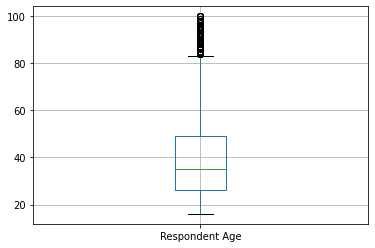

In [22]:
# cheking for outliers on the age variable using a box plot
df.boxplot(column=['Respondent Age'])
plt.show
# we have some outliers of individuals above the age 80years but since it is possible for people to live over the age of 80 and still have access to aank account
# we will not drop the age outliers

In [23]:
# calculating the number of individuals in the outlier
df[df['Respondent Age']>80].value_counts().sum()
# the number of individuals above 80years is 336

336

<function matplotlib.pyplot.show>

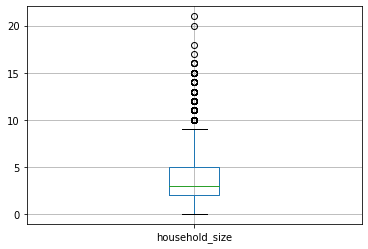

In [24]:
# checking for outliers on the houshold variable using a box plot
df.boxplot(column=['household_size'])
plt.show
# The outlier shown are of households with more than 10 people living under one roof.since it is possible to have such large families we are not going to drop the outliers

In [25]:
# checking for number of unique values in all columns
df.nunique()
# From our question we are focusing on 3 years only therefore there is need to explore the unique values on that column to check the extra ones
# and from variable definitions level of education has 6 levels only. we will therefore check the excess unique value

country                          4
year                             6
uniqueid                      8687
Has a Bank account               2
Type of Location                 2
Cell Phone Access                2
household_size                  21
Respondent Age                  85
gender_of_respondent             2
The relationship with head       6
marital_status                   5
Level of Education               7
Type of Job                     10
dtype: int64

In [26]:
# checking for unique values for the year column
df['year'].unique()
# the dataset provided is for the year 2016,2017 and 2018. we are therfore going to drop the extra years

array([2018, 2029, 2056, 2016, 2039, 2017], dtype=object)

In [27]:
# dropping the years that we will not be using
df.drop(df[df['year']>2018].index, inplace=True)

In [28]:
# confirming the years have been dropped
df['year'].unique()

array([2018, 2016, 2017], dtype=object)

In [29]:
# Checking for unique values for the level of education column
df['Level of Education'].unique()
# from our variable definition '6' is not a defined response but a numerical code for 'Other/Dont know/RTA'. 

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', '6'], dtype=object)

In [30]:
# We therefore neeed to rename/encode the response '6' to 'Other/Dont know/RTA'
df['Level of Education'].replace({'6':'Other/Dont know/RTA'}, inplace=True)
# # checking the replacement
df['Level of Education'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

# Univariate, Bivariate and Multivariate Analysis

In [31]:
# Numeric feature description. Checking for measure of central tendency i.e mean, mode and media   and
# measures of dispersion i.e variance, standard deviation, range and quartile deviation
df.describe()

,household_size,Respondent Age
count,23340.000000,23340.000000
mean,3.688560,38.807069
std,2.281275,16.519905
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,21.000000,100.000000


In [32]:
# From our description above minimum Household size is zero. If there were no individuals interviewed they qualify as outliers and need to be dropped 
df[df['household_size']==0].value_counts().sum()

36

In [33]:
# Dropping households with zero individuals
df.drop(df.index[df['household_size']==0],inplace=True)
df[df['household_size']==0].value_counts().sum()

0

<function matplotlib.pyplot.show>

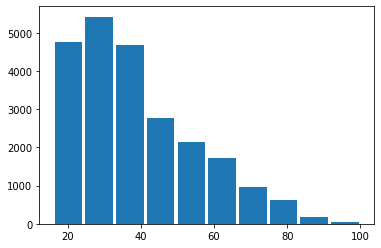

In [34]:
# Plotting distribution of Age Variable using a histogram
x=[df['Respondent Age']]
plt.hist(x,bins=10,rwidth=0.9)
plt.show
# The histogram is positively skewed.majority of our respodents are between the age of 20 and 40, with maximum age of 100 years

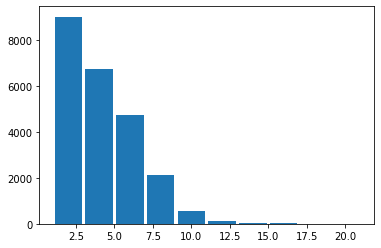

In [35]:
# checking distribution of household variable
x=[df['household_size']]
plt.hist(x,bins=10,rwidth=0.9)
plt.show()
# The household size variable is also right skewed meaning more householdes have fewer number of people living in one house,
# and we have few households having large number of people living in one house

In [36]:
# Calculating the percentage of people with bank accounts.
# This will also help us validate our data since were intially told that or only 13.9% of the adult population have access to or use a commercial bank account.
df['Has a Bank account'].value_counts()*100/len(df)
# From the calculation below 14% of the population has access to bank acccount

No     85.860796
Yes    14.139204
Name: Has a Bank account, dtype: float64

Text(0.5, 1.0, 'Country of Respondent Distribution')

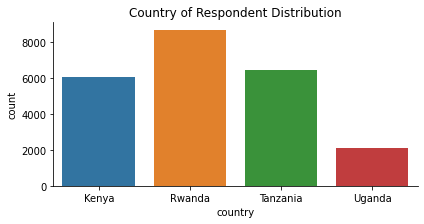

In [37]:
# checking the population representation of respondents per country
sns.catplot(x='country', kind ='count', data =df, height=3, aspect=2)
plt.title('Country of Respondent Distribution')
# Most of the respondent were from Rwanda, followed by Tanzania while, Uganda had the least number

In [128]:
#checking  the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda
print(df.value_counts(subset=['country','Has a Bank account']).sort_index())


country   Has a Bank account
Kenya     No                    4543
          Yes                   1519
Rwanda    No                    7686
          Yes                    997
Tanzania  No                    5866
          Yes                    598
Uganda    No                    1914
          Yes                    181
dtype: int64


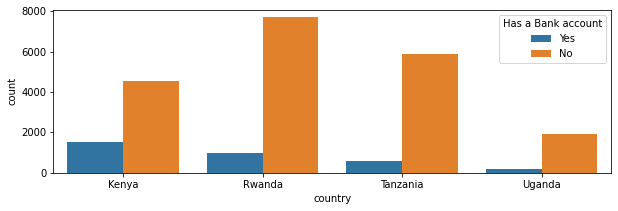

In [129]:
# Household size vs having a bank account
plt.figure(figsize=(10,3))
sns.countplot(x='country', hue='Has a Bank account', data=df )
# Kenya has the highest number of individuals with banks account compared to other countries 

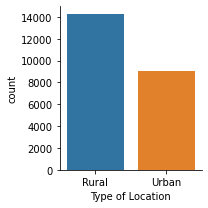

In [38]:
# checking location of our respondents by count
sns.catplot(x='Type of Location', kind='count', data=(df), height=3, aspect=1)
# Majority of our respondets were from rural locations

Text(0.5, 1.0, 'Cell Phone Access Distribution')

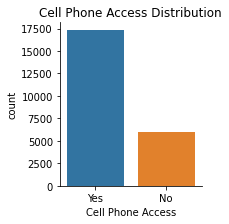

In [39]:
# Checking cell phone access of our respondents
sns.catplot(x='Cell Phone Access', kind='count', data=df, height=3, aspect=1)
plt.title('Cell Phone Access Distribution')
# Majority of the respondents had cell phones

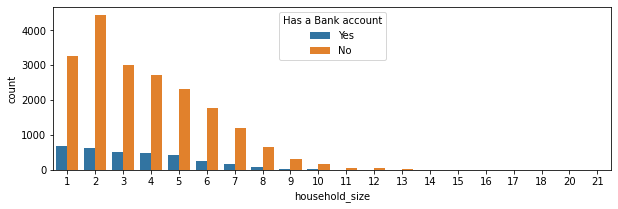

In [40]:
# Household size vs having a bank account
plt.figure(figsize=(10,3))
sns.countplot(x='household_size', hue='Has a Bank account', data=df )
# Smaller households registered  more individuals with bank accounts compared to big households

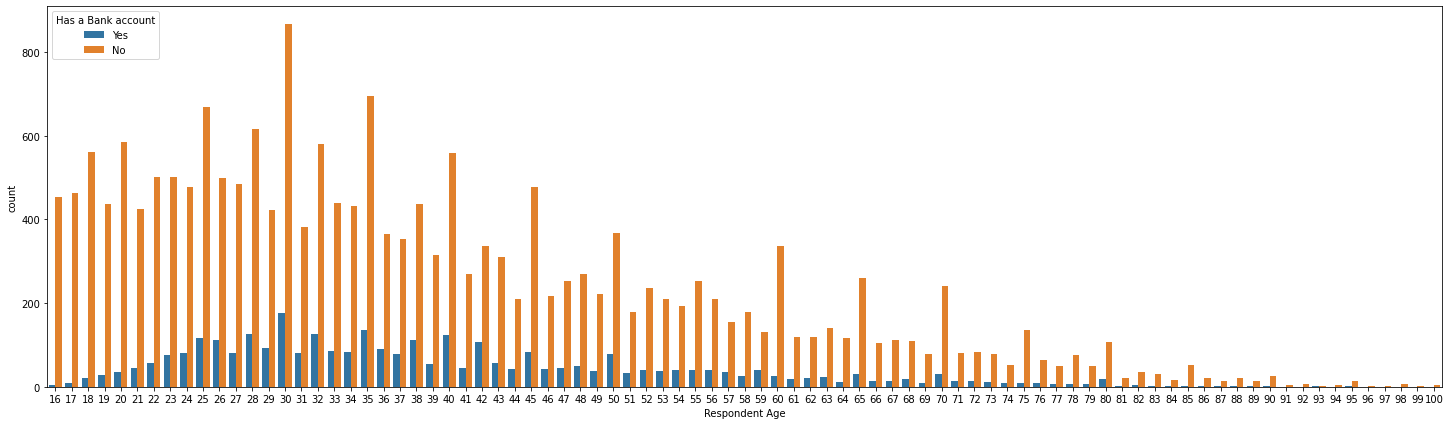

In [41]:
# Camparing respondents age with having access to a bank
plt.figure(figsize=(25,7))
sns.countplot(x='Respondent Age', hue='Has a Bank account', data=df)


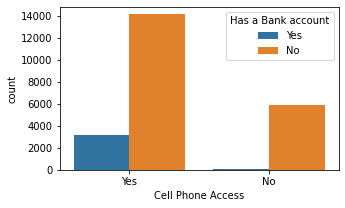

In [42]:
# Visualizing effect of having cell phone access to having a bank account
plt.figure(figsize=(5,3))
sns.countplot(x='Cell Phone Access', hue='Has a Bank account', data=df)
# Asignificant number of individuals withh cell phones access had bank accounts compared to those who didnt have cell phones

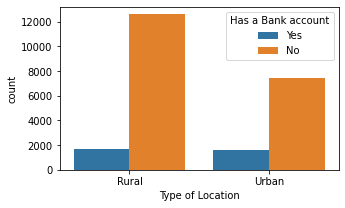

In [43]:
# visualizing type of location against having a bank account
plt.figure(figsize=(5,3))
sns.countplot(x='Type of Location', hue='Has a Bank account', data=df)
# The number of people with bank accounts seem to be almost but since more respondents were from rural areas we will conculed that
# Individuals in the urban areas are more likely to have a bank account compared to those from rural locations

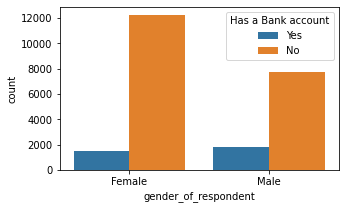

In [44]:
# Checking gender against having a bank acccount
plt.figure(figsize=(5,3))
sns.countplot(x='gender_of_respondent', hue='Has a Bank account', data=df)
# More males had bank accounts regardless of the fact that there were more female respondents

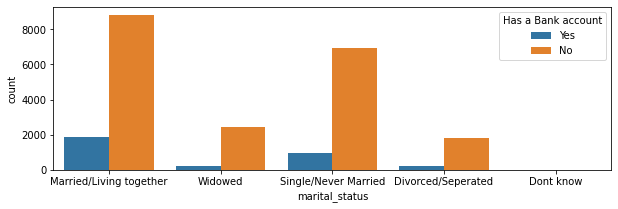

In [45]:
# Checking ther relationship between marital status of respondents and having a bank account
plt.figure(figsize=(10,3))
sns.countplot(x='marital_status', hue='Has a Bank account', data=df)
# The married/living together and sing/never married population contribute to a significant nunmber of individuals with bank accounts

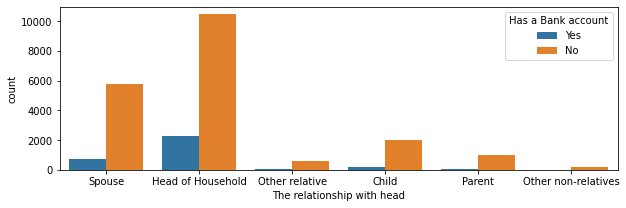

In [46]:
# plotting relationship with head against having a bank account
plt.figure(figsize=(10,3))
sns.countplot(x='The relationship with head', hue='Has a Bank account', data=df)
# Head of households lead with having bank accounts and the number of those accounts reduce significantly as the relationship with the head weakens

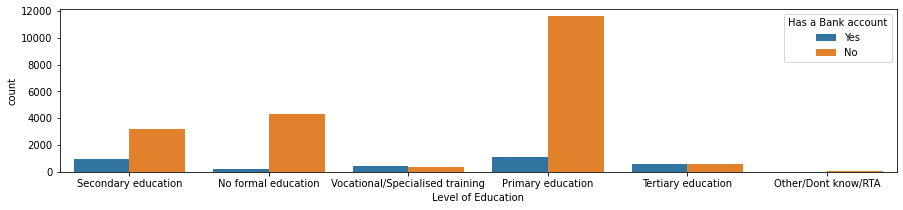

In [47]:
# check whether there is a relationship between level of eduation and having a bank account
plt.figure(figsize=(15,3))
sns.countplot(x='Level of Education', hue='Has a Bank account', data=df,)
#Inviduals with high level of education have bank accounts compared to individuals with lower levels of education 

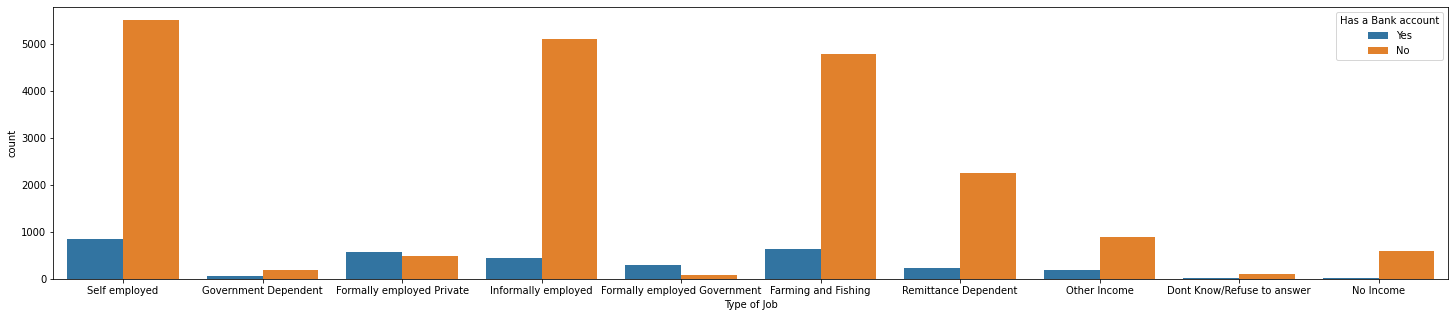

In [48]:
# type of job vs having a bank account
plt.figure(figsize=(25,5))
sns.countplot(x='Type of Job', hue='Has a Bank account', data=df)
# Our data contained high number of self employed, informally employed and individuals involved in farming and fishing out of which a significanct number had bank accounts
# It is however important to note that even if the number of formally employed invidual is small the likelihood of such individuals having a bank account is higher

Principal Component Analysis(PCA)

In [123]:
# using label encoding  to convert categorical data to continuous 
# importing labelencoder from sklearn
from sklearn.preprocessing import LabelEncoder
# creating instance of labe encoder
le=LabelEncoder()

In [124]:
cols=  ['Type of Location','Cell Phone Access','gender_of_respondent', 'The relationship with head', 'marital_status','Level of Education', 'Type of Job']
# encoding labels of multiple columns at once
df[cols] = df[cols].apply(le.fit_transform)
# previewing
df.head()


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relationship with head,marital_status,Level of Education,Type of Job
0,Kenya,2018,uniqueid_1,Yes,0,1,3,24,0,5,2,3,9
1,Kenya,2018,uniqueid_2,No,0,0,5,70,0,1,4,0,4
2,Kenya,2018,uniqueid_3,Yes,1,1,5,26,1,3,3,5,9
3,Kenya,2018,uniqueid_4,No,0,1,5,34,0,1,2,2,3
4,Kenya,2018,uniqueid_5,No,1,0,8,26,1,0,3,2,5


In [52]:
# PERFORMING PCA
# Preprocessing - dividing the dataset into a feature set and corresponding labels
X= df.drop(['Has a Bank account','country','year','uniqueid'], axis=1)
Y = df['Has a Bank account']
# feature(input) are stored in x variable and lables(output) y variable

In [53]:
# splitting dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)


In [54]:
# performing a standard scalr normalization to normalize our feature set
from sklearn.preprocessing import StandardScaler

# feature sets are on the x variable
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [55]:
# Applying PCA
from sklearn.decomposition import PCA
pca =PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
# We did not specify the number of components therefore all the feature in the feature set will
# be returned for both the training and test sets

In [56]:
# checking the variance caused by each of the principal components
explained_var = pca.explained_variance_ratio_
explained_var
# The first principal component is responsible for 18.75% variance, second -17.75%, 3rd -17.04%, 4th -10.74%, 5th-9.35%
# 6th -8.16%, 7th - 6.91%, 8th - 6.12% and 9th -5.13%

array([0.18754187, 0.17759085, 0.1704136 , 0.1074644 , 0.09351871,
       0.0816973 , 0.069167  , 0.0612552 , 0.05135108])

**Insights and Recommendation**

1.Kenya has the highest number of indiduals with bank account adn Uganda has the least

2.Male individuals, people with cell phones, those living in urban locations, heads of housholds, married/living together and sigle/never married, people with high level of education and all forms of employment are more likely to have or use bank accounts compared to other categories

# QUESTION 2: HYPOTHESIS TESTING

**a)Defining the question**

Investigate a claim about the blue cars from provided autolib dataset by formulating and testing hypothesis


**b) Defining Metric of Success**

1.Clearly defined null and alternative hypothesis

2.Test and document conclusion of the hypothesis

**c)Understanding the Context**

We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.
In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. An example of claim to test would be "Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z? Etc”. The selected periods of interest be either weekdays or weekends but not a mix of both. You can also consider postal codes 75015 vs 75017 to some of the areas of interest.



**d)Experimental design taken**

1.Defining the research question, the metric for success, the context, experimental design taken and the appropriateness of the available data

2 EDA and data cleaning

3.Performing univariate, bivariate analysis recording your observations.

4.Performing hypothesis testing

**e)Data relevance/appropriateness of data**

Dataset link https://bit.ly/DSCoreAutolibDataset

Glossary link https://bit.ly/DSCoreAutolibDatasetGlossary

# Reading the data

In [60]:
# Importing libraries that we will be using
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [61]:
# loading data from the link provided
url = 'https://bit.ly/DSCoreAutolibDataset'
# https://bit.ly/DSCoreAutolibDatasetGlossary
autolib_df = pd.read_csv('https://bit.ly/DSCoreAutolibDataset')
# previewing our data
autolib_df

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [63]:
# previewing the top of our data
autolib_df.head()
# top 4 rows of our data

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [64]:
# previewing bottom of our data
autolib_df.tail()
# the last 5 rows of our data

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [65]:
# checking the shape of our dataset
print ('The dataset has ' +str(autolib_df.shape[0]) + ' rows, and ' + str(autolib_df.shape[1]) + ' columns')

The dataset has 16085 rows, and 13 columns


In [66]:
# checking the data types 
autolib_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


# Data Cleaning

In [67]:
# checking for missing data
autolib_df.isnull().sum()
# There no missing values

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [68]:
# checking for duplicate values
autolib_df.duplicated().sum()
# Ther are no duplicated values

0

In [69]:
# listing columns in our dataset
autolib_df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [70]:
# our aim is to investigate a claim about the blue cars from the provided Autolib dataset.
# We will therefore drop the columns that we will not be using and create a new dataframe without the columns
autolib_df1 = autolib_df.drop(['n_daily_data_points','Utilib_taken_sum','Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum','Slots_freed_sum', 'Slots_taken_sum'], axis=1)
# # previewig our new dataset
autolib_df1


,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,0,weekday,110,103
1,75001,1/2/2018,1,weekday,98,94
2,75001,1/3/2018,2,weekday,138,139
3,75001,1/4/2018,3,weekday,104,104
4,75001,1/5/2018,4,weekday,114,117
...,...,...,...,...,...,...
16080,95880,6/15/2018,4,weekday,15,10
16081,95880,6/16/2018,5,weekend,19,19
16082,95880,6/17/2018,6,weekend,33,35
16083,95880,6/18/2018,0,weekday,11,14


In [71]:
# dropping the outliers
Q1= autolib_df.quantile(0.25)
Q3= autolib_df.quantile(0.75)
IQR =Q3 - Q1

# Removing outliers
autolib_df2 = autolib_df1[~((autolib_df1 < (Q1 -1.5 * IQR)) | (autolib_df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

# Checking the shape of our new dataset
print(autolib_df2.shape)
# Checking the shape of our old dataset
print(autolib_df1.shape)



(12020, 6)
(16085, 6)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  import sys


# Univariate Analysis

In [72]:
# Checking for measure of central tendency and measures of dispersion 
autolib_df2[['BlueCars_taken_sum','BlueCars_returned_sum']].describe()

,BlueCars_taken_sum,BlueCars_returned_sum
count,12020.000000,12020.000000
mean,50.772962,50.775707
std,49.901088,49.699869
min,0.000000,0.000000
25%,16.000000,17.000000
50%,34.000000,34.000000
75%,68.000000,68.000000
max,302.000000,306.000000


In [73]:
# creating a dataframe of the day of the week that we will be considering
autolib_df3 = autolib_df2[autolib_df2.day_type == 'weekend']

In [74]:
autolib_df3.sample(5)

,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
12898,93800,4/1/2018,6,weekend,24,15
13929,94150,1/28/2018,6,weekend,22,10
6576,92240,1/28/2018,6,weekend,110,115
13868,94140,5/6/2018,6,weekend,66,76
7443,92300,4/28/2018,5,weekend,193,190


In [75]:
# Checking the shape of the dataset that only contains weekend data
autolib_df3.shape
# our data has 3381 rows and 6 columns

(3381, 6)

In [76]:
# checking for unique values on the day of the week variable
autolib_df3['day_type'].unique()

array(['weekend'], dtype=object)

In [77]:
autolib_df3['dayOfWeek'].value_counts(normalize=True)*100
# There are 2 days considered as weekends. Day 6 had more entries than day 5

6    50.192251
5    49.807749
Name: dayOfWeek, dtype: float64

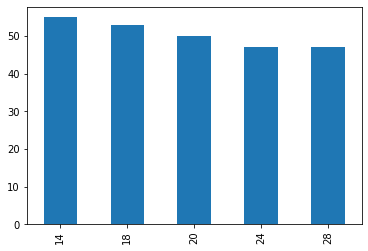

In [78]:
# Bar graph of blue cars taken
autolib_df3['BlueCars_taken_sum'].value_counts().head().plot(kind ='bar')
# The most frequent number of blue cars taken is 14

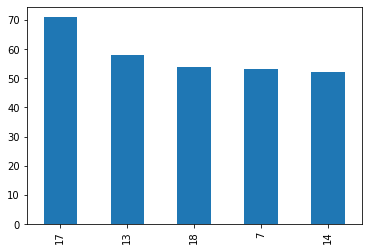

In [79]:
# Bar graph of blue cars returned
autolib_df3['BlueCars_returned_sum'].value_counts().head().plot(kind ='bar')
# The most frequent number of blue cars take is 17

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Blue cars Taken')

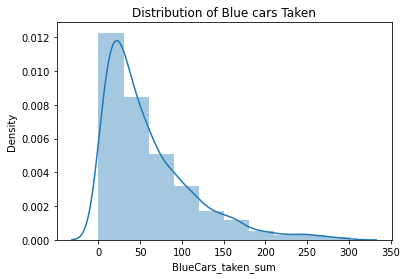

In [81]:
# plotting the distribution of blue cars taken to check normality of the distribution
x=autolib_df3['BlueCars_taken_sum']
sns.distplot(x, bins=10)
plt.title('Distribution of Blue cars Taken')
# the data is positively skewed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Blue cars returned')

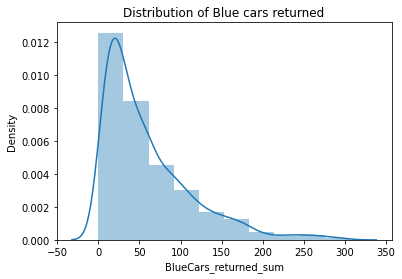

In [82]:
# plotting the distribution of blue cars taken to check normality of the distribution
x=autolib_df3['BlueCars_returned_sum']
sns.distplot(x, bins=10)
plt.title('Distribution of Blue cars returned')
# the data is also positively skewed

# Bivariate Analysis

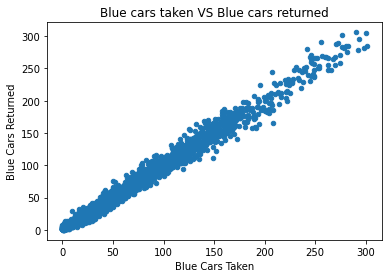

In [84]:
# Scatter plot
autolib_df3.plot(x='BlueCars_taken_sum', y = 'BlueCars_returned_sum', kind = 'scatter')
plt.title('Blue cars taken VS Blue cars returned')
plt.xlabel('Blue Cars Taken')
plt.ylabel('Blue Cars Returned')
plt.show()
# The scatter graph shows that blue cars taken are strongly correlated to blue cars returned

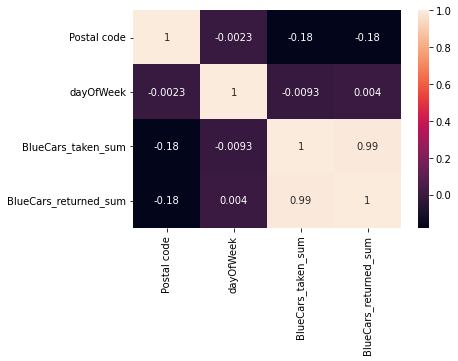

In [86]:
# Heatmap
sns.heatmap(autolib_df3.corr(),annot=True)
plt.show()
# There is a strong correlation between blue cars taken and blue cars returned

# Hypothesis testing
Null Hypothesis:

The number of Blue cars taken during the weekend is equal to the number of Blue cars returned during the weekend

Alternative Hypothesis:

The number of Blue cars taken during the weekend is not equal to the number of Blue cars returned during the weekend

In [87]:
# we will use startified sampling 
sample = autolib_df3.groupby('dayOfWeek', group_keys=False).apply(lambda grouped_subset:grouped_subset.sample(frac=0.1))
# previewing our sample data
sample
# our sample contains 338 rows and 6 columns

,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
11503,93350,1/13/2018,5,weekend,20,16
14047,94150,6/9/2018,5,weekend,14,16
4994,92130,1/6/2018,5,weekend,249,257
12681,93700,1/27/2018,5,weekend,58,60
7550,92310,3/10/2018,5,weekend,74,69
...,...,...,...,...,...,...
6753,92250,2/18/2018,6,weekend,76,88
6969,92260,4/22/2018,6,weekend,43,41
4684,92110,1/7/2018,6,weekend,28,27
5973,92200,2/18/2018,6,weekend,69,70


In [99]:
# dropping columns
sample.drop(['day_type', 'Postal code','date'], axis=1, inplace=True)
sample

,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum
11503,5,20,16
14047,5,14,16
4994,5,249,257
12681,5,58,60
7550,5,74,69
...,...,...,...
6753,6,76,88
6969,6,43,41
4684,6,28,27
5973,6,69,70


In [119]:
# Population mean of Blue cars taken
PopMeanBt = autolib_df['BlueCars_taken_sum'].mean()
PopMeanBt

125.92695057506994

In [121]:
# Population mean of Blue cars returned 
PopMeanBr =autolib_df['BlueCars_returned_sum'].mean()
PopMeanBr

125.912713708424

In [106]:
# Sample mean -Blue cars taken
SampleMeanBt = sample['BlueCars_taken_sum'].mean()
SampleMeanBt


58.57988165680474

In [107]:
# Sample mean -Blue cars returned
SampleMeanBr = sample['BlueCars_returned_sum'].mean()
SampleMeanBr

58.40236686390533

In [109]:
# calculating the standard deviation of blue cars taken in our sample
SampleSD = sample['BlueCars_taken_sum'].std()
SampleSD

54.23354112332396

In [111]:
# Our sample is greater that 30 entries therfore we will not use t test
# we will use z-test

# Calculating the z-scores
zscore=(SampleMeanBt -PopMeanBt) / SampleSD
zscore

-0.02643065500057415

In [115]:
# P - value calculation
from scipy.stats import norm
from scipy import stats
P= stats.norm.cdf(zscore)
P

0.4894569217656189

In [116]:
# Interpretation of P value in relation to our chosen alpha of 0.05
if P <0.05:
  print('We are rejecting the null hypothesis')
else:
  print('We fail to reject the null hypothesis')

We fail to reject the null hypothesis


In [120]:
# calculaying point estimation by sabracting Sample mean from population mean of blue cars taken
PopMeanBt - SampleMeanBt

67.3470689182652

In [122]:

# calculating the z-critical value
z_critical = stats.norm.ppf(q=0.975)
print('z-critical value: ')
print(z_critical)

print('\n')

# calculating the polulation standard deviation
PopSD = autolib_df['BlueCars_taken_sum'].std()

import math
margin_of_error = z_critical*(PopSD/math.sqrt(296))
confidence_interval = (SampleMeanBt - margin_of_error,
                       SampleMeanBt + margin_of_error)

print('Confidence Interval')
print(confidence_interval)

z-critical value: 
1.959963984540054


Confidence Interval
(37.45597591746221, 79.70378739614726)


We fail to reject the null hypothesis because the was no enough evidence to prove that the number of Blue cars taken during the weekend is not equal to the number of Blue cars returned